# Importing the Depedencies:

In [1]:
import numpy as np               #FOR CONVERTING IMAGES IN ARRAYS
import matplotlib.pyplot as plt  #FOR VISUALIZATION
import seaborn as sns            #FOR VISUALIZATION
import cv2                       #Image processing 
from PIL import Image            #Image processing
import tensorflow as tf          #Deep learning library
tf.random.set_seed(3)            #For random set or random 3 values
from tensorflow import keras     #google based library 
from keras.datasets import mnist #dataset inbuild
from tensorflow.math import confusion_matrix 
import warnings
warnings.filterwarnings('ignore')

# Data Collection MNIST DATA from keras.datasets

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

## Shape of numpy arrays or our data

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Training Data = 60000 images**

**Test Data = 10000 images**

**Image dimension --> 28 x 28**

**Grayscale Image --> 1 channel**

## Printing the 10th image


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


## Displaying this image

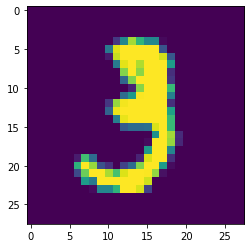

3


In [7]:
plt.imshow(X_train[10])
plt.show()

print(Y_train[10])

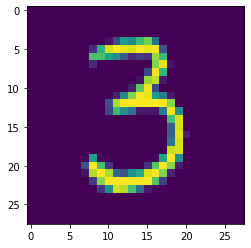

3


In [8]:
#Similarly
plt.imshow(X_train[50])
plt.show()

print(Y_train[50])

## Image labels

**ALL THE IMAGES IN THIS DATA SET ARE IN SAME DIMENSION**

In [9]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [10]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also apply One Hot Encoding**

## Scaling the value ---Normalization

**Ranges 0-255 we will convert into 0-1** 

In [11]:
X_train=X_train/255
X_test=X_test/255

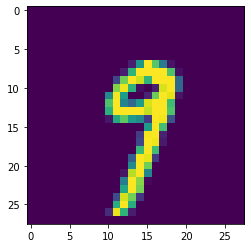

9


In [12]:
plt.imshow(X_train[133])
plt.show()

print(Y_train[133])


# Building the Neural Network

## Setting up the layers for ANN:

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),   # our number of neurons in layer
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') #number of values 0-9=10
])

## Compiling the ANN:

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the NN:

In [15]:
model.fit(X_train,Y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3078 - accuracy: 0.9094
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9593
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9689
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9742
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9779
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9813
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9845
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9849
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9872
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

### OUR TRAINING DATASET ACCURACY IS 99.28%

## Accuracy on Test Data

In [16]:
loss, accuracy= model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1169 - accuracy: 0.9731
0.9731000065803528


### OUR TRAINING DATASET ACCURACY IS 97.31%

In [17]:
print(X_test.shape)

(10000, 28, 28)


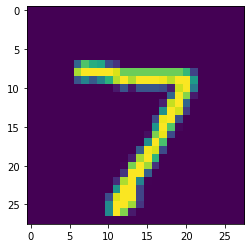

In [18]:
#FIRST DATAPOINT IN X_test
plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


#### Checking the individual predictions by our model

In [20]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])    #This is the probabilty that the label is 0 and second is the probabilty for 1 and so on

[6.5630339e-03 5.1662006e-04 1.3621957e-02 7.8253061e-01 1.1692245e-07
 1.8676228e-03 9.3817381e-09 1.0000000e+00 4.4354588e-02 4.4070342e-01]


### Converting the prediction proabilities to class label

In [23]:
label_for_first_image = np.argmax(Y_pred[0])    #Index of the number compare to other values -- argmax()

In [24]:
print(label_for_first_image)

7


### Converting the prediction proabilities to class label for all test data point

In [25]:
Y_pred_labels= [np.argmax(i) for i in Y_pred]

In [26]:
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 3, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Y_test ---> True labels**

**Y_pred_labels ---> My predcited Labels**

## Confusion matrix

In [27]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 965    1    2    1    0    6    1    2    1    1]
 [   0 1124    3    2    0    1    1    1    3    0]
 [   2    1 1012    5    3    0    0    8    1    0]
 [   0    0    5  997    0    5    0    2    1    0]
 [   1    1    2    1  966    0    4    2    0    5]
 [   4    0    0   35    0  841    2    2    5    3]
 [   9    3    3    2    3   24  911    0    3    0]
 [   0    5   10    5    2    0    0 1000    3    3]
 [   3    2    4   15    4   11    0    3  925    7]
 [   1    3    2    6   16    4    0   10    1  966]], shape=(10, 10), dtype=int32)


### Bulding a heatmap for this confusion matrix

Text(0.5, 69.0, 'Predicted Labels')

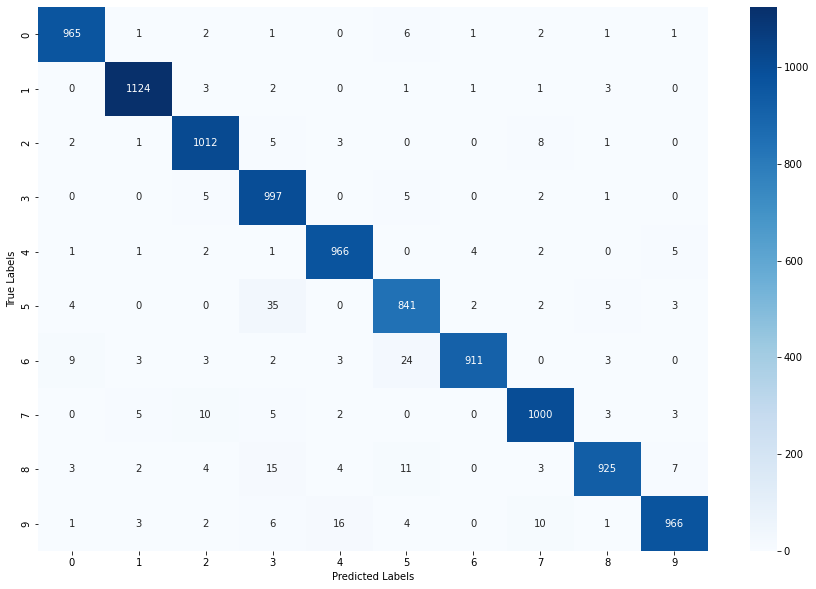

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot=True,cmap='Blues', fmt='d')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

# Building a Predictive System For our model

In [48]:
# path 
path = r'C:\Users\Administrator\Desktop\Machine Learning\MNIST Digit Classification with Neural Network\MNIST_digit.png'  
##OUR NUMBER IS 3  
# Reading an image in default mode
image = cv2.imread(path)

In [49]:
type(image)

numpy.ndarray

In [50]:
image.shape

(318, 318, 3)

In [51]:
#Converting to grayscale
gray= cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [52]:
gray.shape

(318, 318)

In [53]:
#Resizing the image
image_reshape = cv2.resize(gray,(28,28))

In [54]:
image_reshape.shape

(28, 28)

In [57]:
image_reshape=image_reshape/255


In [58]:
image_reshape.shape

(28, 28)

In [59]:
image_reshaped = np.reshape(image_reshape,[1,28,28])


In [60]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 78ms/step
[[9.0819323e-12 4.1085216e-01 2.3578249e-03 1.0000000e+00 2.8355900e-18
  3.9495784e-04 1.8518860e-20 8.2218014e-02 7.4240077e-01 3.2197757e-04]]


In [61]:
input_pred_label = np.argmax(input_prediction)

In [63]:
print ("The Handwritten Digit is recognised as " , input_pred_label)

The Handwritten Digit is recognised as  3


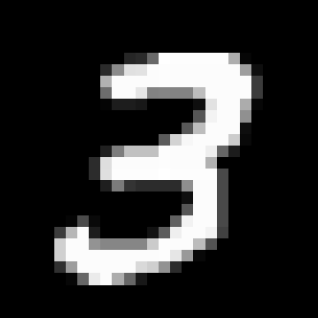